In [64]:
import importlib
import graphviz
import graph
import graph_games
import game_solver
from typing import Union
importlib.reload(graph)
importlib.reload(graph_games)
importlib.reload(game_solver)

<module 'game_solver' from '/home/nemo/Graph_Game_Design/game_solver.py'>

In [65]:
def visualize(g: Union[graph.Graph, graph_games.Game]) -> graphviz.Graph:
    if isinstance(g, graph.Graph):
        dot = graphviz.Graph()
        drawn = set()
        for ni in g.nodes:
            dot.attr('node', shape='circle')
            drawn.add(ni)
            dot.node(ni)
            #print(list((ni, nj) for nj in g.edges[ni]))
            dot.edges((ni,nj) for nj in g.edges[ni] if nj in drawn)
        return dot
    if isinstance(g, graph_games.K_DominationGame):
        dot = graphviz.Graph()
        drawn = set()
        print(dot.node_attr)
        for ni in g.graph.nodes:
            if ni in g.dominators:
                dot.attr('node', shape='circle', style='filled', color='pink')
            else:
                dot.attr('node', shape='circle', style='', color='black')
            dot.node(ni, str(g.getUtil(ni)))
            drawn.add(ni)
            dot.edges((ni,nj) for nj in g.graph.neighbors(ni) if nj in drawn)
        dot.attr(label=f'Loss of each Nodes \n ( k={g.k} )')
        return dot
    if isinstance(g, graph_games.MaximalMatchingGame):
        dot = graphviz.Digraph()
        drawn = set()
        print(dot.node_attr)
        dot.attr('edge', dir="none", color="black")
        dot.attr('node', shape='circle', style='', color='black')
        for ni in g.graph.nodes:
            dot.node(ni, f"{g.getUtil(ni):4.2f}")
            drawn.add(ni)
            dot.edges((ni,nj) for nj in g.graph.neighbors(ni) if nj in drawn)
        dot.attr('edge', dir="", color="red")
        for ni in g.graph.nodes:
            nj = g.strategy[ni]
            if nj != None:
                dot.attr('edge')
                dot.edge(ni,nj)
        dot.attr(label=f"Maximal Matching Game \n ( Red Arrow Indicate Player's Ation )")
        return dot




{}


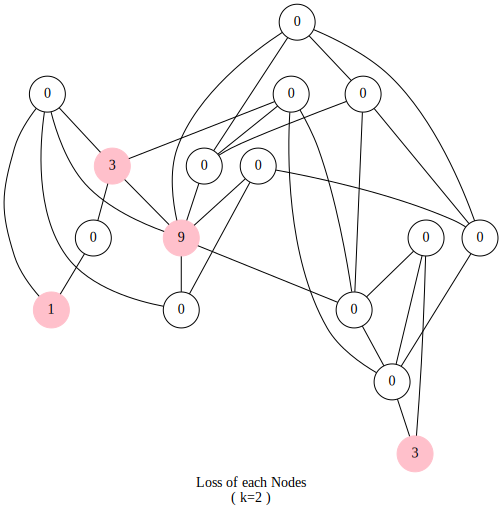

In [15]:
g = graph.randomWSGraph(n=16, k=4, link_rewiring_prob=0.5)
gg = graph_games.K_DominationGame(2, g)
gg.randomInit()
visualize(gg)

{}


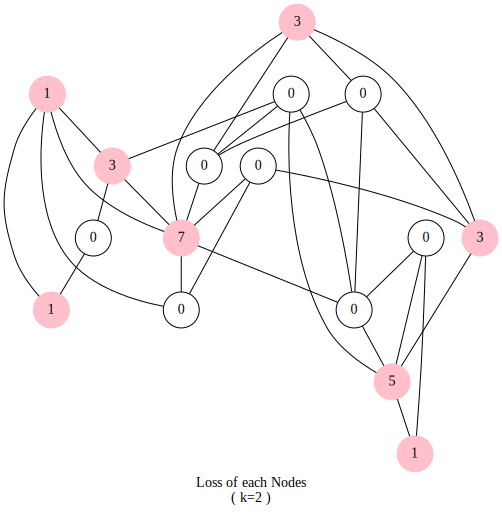

In [16]:
game_solver.bestResponseSolver(gg)
visualize(gg)

In [17]:
gg.checkDomination()

True

{}


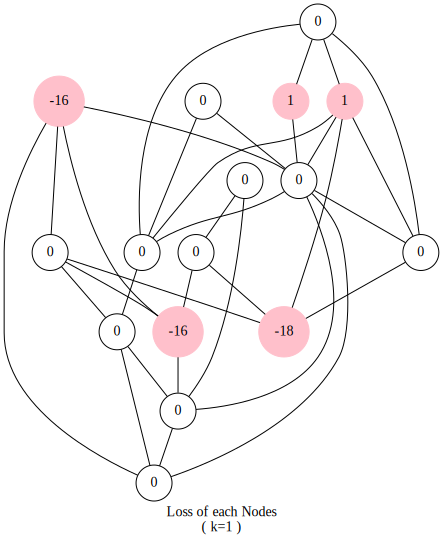

In [18]:
g = graph.randomWSGraph(n=16, k=4, link_rewiring_prob=0.5)
gg = graph_games.AsymmetricIDSGame(g)
gg.randomInit()
visualize(gg)

{}


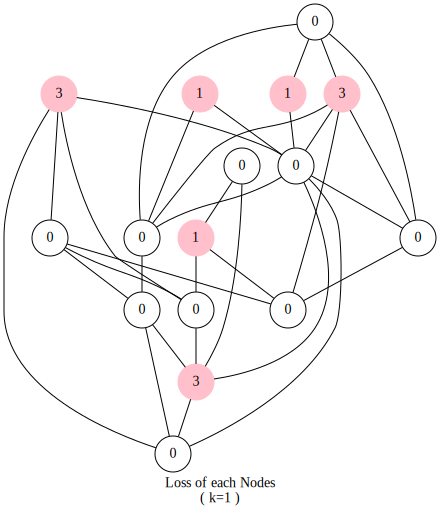

In [19]:
gg.solve(game_solver.bestResponseSolver)
visualize(gg)

In [20]:
print(gg.checkDomination())
print(gg.checkIndependence())

True
True


In [30]:
import graph
from game_solver import bestResponseSolver
from graph_games import K_DominationGame, AsymmetricIDSGame
from matplotlib import pyplot as plt

repeat_num = 1000
result = {}
for game in ["K_DominationGame", "AsymmectricIDSGame"]: 
    print("-"*30)
    print(f'Game = {game}')
    print(f'{"rewiring_prob":15}, {"move_counts per node":20}, {"cardinality":15}')
    rp = []
    mc = []
    cd = []
    for rewire_prob_times_100 in range(0, 90, 1):
        rewiring_prob = rewire_prob_times_100 / 100
        move_counts = []
        cardinalities = []
        for i in range(repeat_num):
            g = graph.randomWSGraph(n=30, k=4, link_rewiring_prob=rewiring_prob)
            if game == "K_DominationGame":
                gg = K_DominationGame(2, g) # run with k = 2
            else: 
                gg = AsymmetricIDSGame(g)
                
            gg.randomInit()
            move_count = gg.solve(bestResponseSolver)
            cardinality = gg.dominationSetCardinality()
            move_counts.append(move_count)
            cardinalities.append(cardinality)
            if game == "K_DominationGame":
                assert gg.checkDomination()
            else:
                assert gg.checkDomination()
                assert gg.checkIndependence() 
        rp.append(rewiring_prob)
        mc.append(sum(move_counts)/repeat_num / 30) # move_count per node, so / 30
        cd.append(sum(cardinalities)/repeat_num)
        print(f'{rewiring_prob:15.2f}, {mc[-1]:20.2f}, {cd[-1]:15.2f}')
    result[game] = (rp, mc, cd)   

------------------------------
Game = K_DominationGame
rewiring_prob  , move_counts per node, cardinality    
           0.00,                 0.30,           12.69
           0.01,                 0.31,           12.77
           0.02,                 0.32,           12.82
           0.03,                 0.32,           12.85
           0.04,                 0.33,           12.90
           0.05,                 0.32,           12.98
           0.06,                 0.34,           13.03
           0.07,                 0.34,           13.05
           0.08,                 0.34,           13.10
           0.09,                 0.35,           13.13
           0.10,                 0.35,           13.21
           0.11,                 0.36,           13.22
           0.12,                 0.37,           13.24
           0.13,                 0.37,           13.30
           0.14,                 0.37,           13.29
           0.15,                 0.37,           13.35
          

Text(0, 0.5, 'Cardinality of Dominating Set')

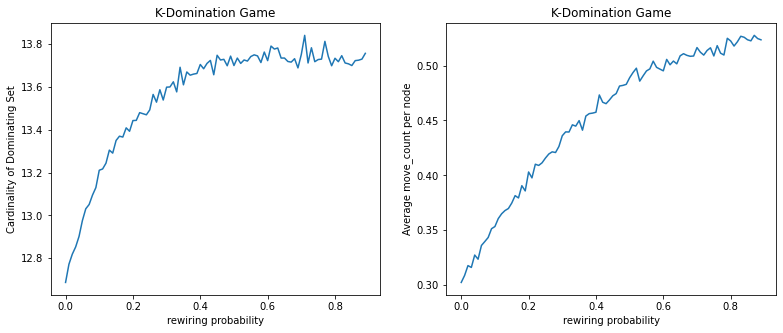

In [34]:
fig = plt.figure(figsize=(13,5))
axs0 = fig.add_subplot(1,2,2)
axs0.plot(result["K_DominationGame"][0], result["K_DominationGame"][1])
axs0.set(title="K-Domination Game")
axs0.set_xlabel("rewiring probability")
axs0.set_ylabel("Average move_count per node")

axs1 = fig.add_subplot(1,2,1)
axs1.plot(result["K_DominationGame"][0], result["K_DominationGame"][2])
axs1.set(title="K-Domination Game")
axs1.set_xlabel("rewiring probability")
axs1.set_ylabel("Cardinality of Dominating Set")

Text(0, 0.5, 'Cardinality of IDS')

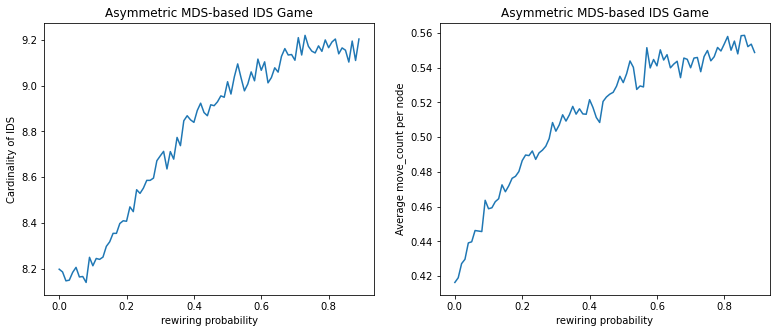

In [31]:
fig = plt.figure(figsize=(13,5))
axs0 = fig.add_subplot(1,2,2)
axs0.plot(result["AsymmectricIDSGame"][0], result["AsymmectricIDSGame"][1])
axs0.set(title="Asymmetric MDS-based IDS Game")
axs0.set_xlabel("rewiring probability")
axs0.set_ylabel("Average move_count per node")

axs1 = fig.add_subplot(1,2,1)
axs1.plot(result["AsymmectricIDSGame"][0], result["AsymmectricIDSGame"][2])
axs1.set(title="Asymmetric MDS-based IDS Game")
axs1.set_xlabel("rewiring probability")
axs1.set_ylabel("Cardinality of IDS")

{}


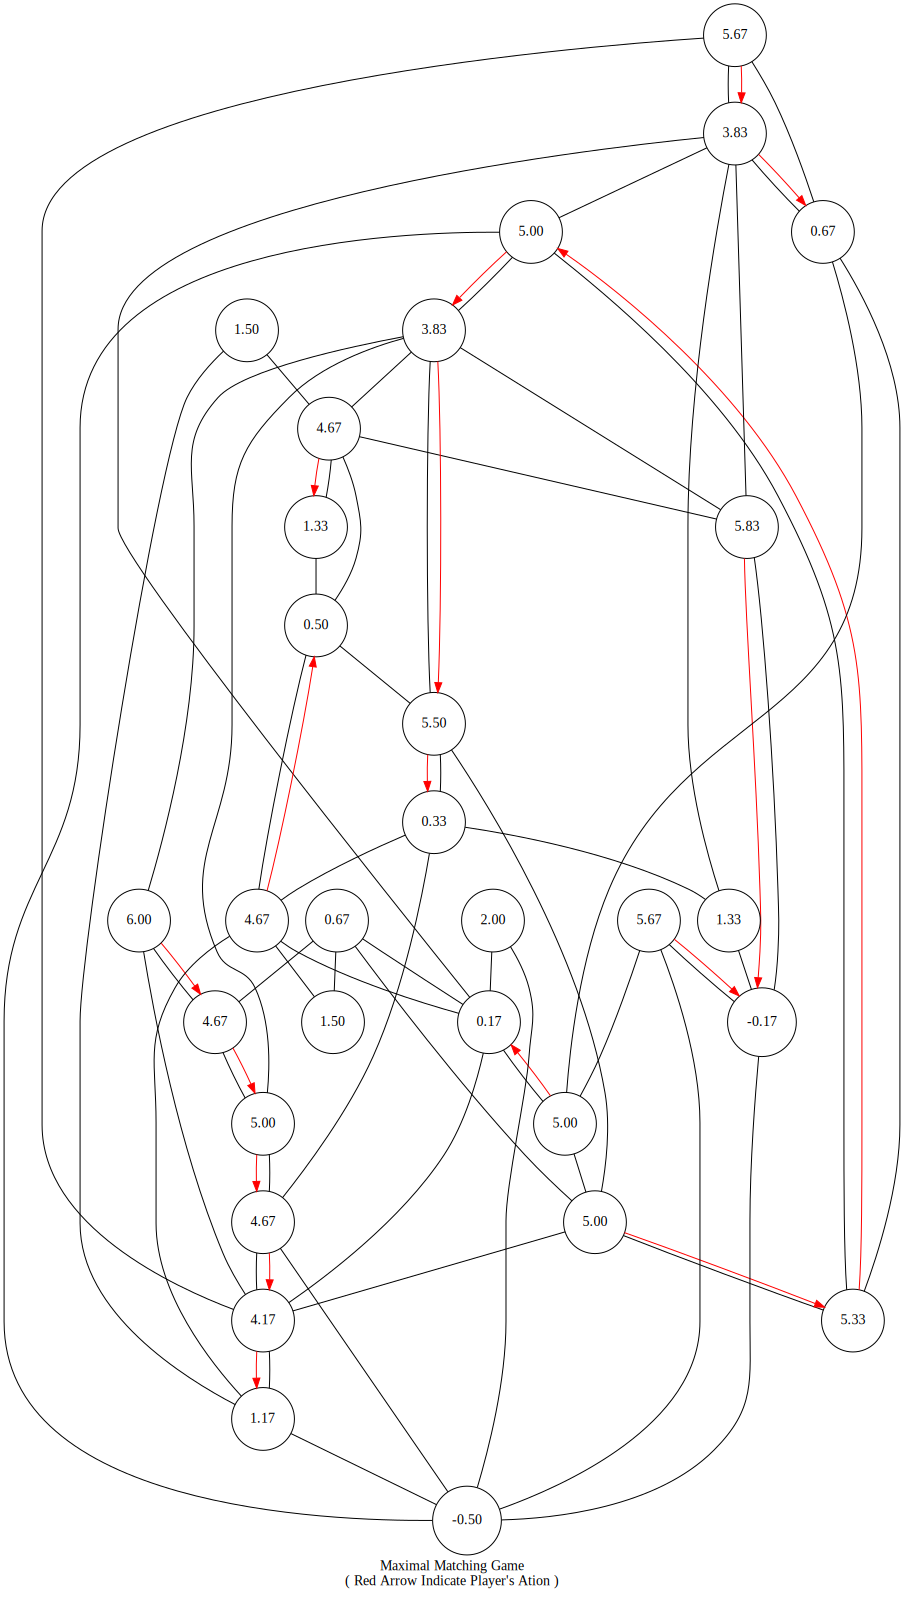

In [68]:
g = graph.randomWSGraph(n=30, k=4, link_rewiring_prob=0.5)
gg = graph_games.MaximalMatchingGame(g, deg_penalty=True, robbing_reward=True)
gg.randomInit()
visualize(gg)

{}


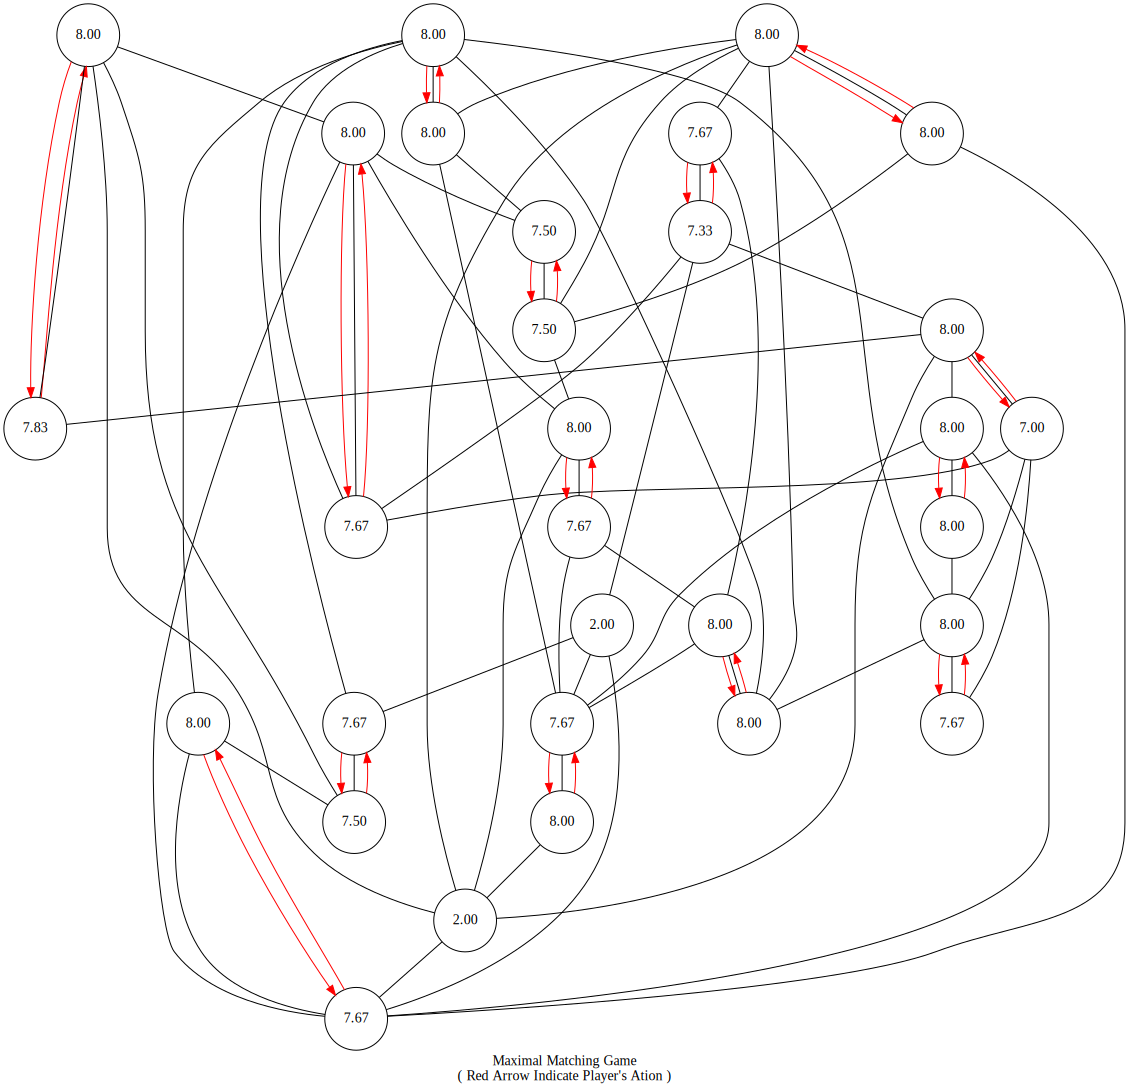

In [69]:
gg.solve(game_solver.bestResponseSolver)
visualize(gg)